# Getting started
This notebook illustrates the basic usage of Vis4D. We will visualize a COCO image with detections from Faster RCNN.

First, import the necessary components from the library


In [ ]:

import warnings
warnings.filterwarnings("ignore")

from vis4d.model.detect.faster_rcnn import FasterRCNN

from vis4d.data.const import CommonKeys as K
from vis4d.vis.functional import imshow_bboxes

from vis4d.config import instantiate_classes
from vis4d.config.common.datasets.coco import get_coco_detection_cfg

import logging
from vis4d import _logger
_logger.setLevel(logging.ERROR)


Now, let's create the dataset and fetch the image from it.

In [13]:

# Create dataloader for COCO using the default config
dataloader_cfg = get_coco_detection_cfg(
    "data/coco_test/",
    train_split="train",
    test_split="train",
    samples_per_gpu=1,
)

test_dataloader = instantiate_classes(dataloader_cfg.test_dataloader)[0]
batch = next(iter(test_dataloader))
inputs, images_hw = (
    batch[K.images],
    batch[K.input_hw],
)

Next, we can initialize and run the model on it.

In [14]:

faster_rcnn = FasterRCNN(num_classes=80, weights="mmdet")

faster_rcnn.eval()
dets = faster_rcnn(inputs, images_hw, original_hw=images_hw)

Finally, let's visualize the result.

torch.Size([3, 800, 1248]) torch.Size([52, 4])


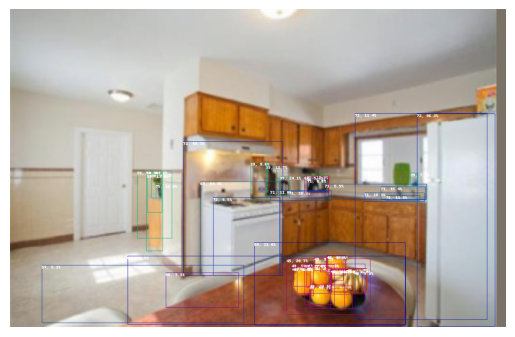

In [15]:
print(inputs[0].shape, dets.boxes[0].shape)
imshow_bboxes(inputs[0], dets.boxes[0], dets.scores[0], dets.class_ids[0])